In [6]:
import sys
sys.path.insert(0, "/media/allen/mass/SPOS-pytorch/")
import os
os.chdir("/media/allen/mass/SPOS-pytorch/")

import torch
from src.factory.config_factory import _C as cfg
from src.graph.spos import SPOS
from tools.spos_utils import Evolution
import logging
logger = logging.getLogger('logger')

In [7]:
cfg.INPUT.RESIZE = (112,112)
cfg.DB.NUM_CLASSES = 7
cfg.SPOS.USE_SE = True
cfg.SPOS.LAST_CONV_AFTER_POOLING = True
cfg.SPOS.CHANNELS_LAYOUT = "OneShot"

In [13]:
graph = SPOS(cfg)

darwin = Evolution(cfg, graph)

In [6]:
a = b = 0

In [14]:
evolve_map = []
for i in range(20000):
    darwin.cur_step = i
    max_flop, pick_id, range_id, find_max_param = darwin.get_cur_evolve_state()       
    evolve_map.append([pick_id, find_max_param, max_flop, darwin.param_range[range_id]])

In [15]:
import numpy as np
evolve_map = np.array(evolve_map)

In [16]:
xmin = evolve_map[:, 2].min() 
xmax = evolve_map[:, 2].max() 
ymin = evolve_map[:, 3].min() 
ymax = evolve_map[:, 3].max()

In [17]:
xmax

222.94147900000004

In [18]:
import seaborn as sns

(0.8721030000000001, 6.896423000000001)

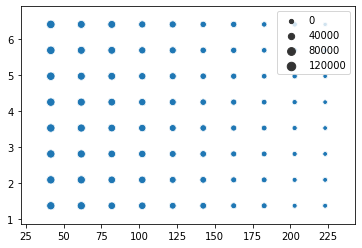

In [21]:
size = 10000
ax = sns.scatterplot(x=evolve_map[:size,2], y=evolve_map[:size,3], size=list(range(0, 10*size, 10)))
ax.set_xlim(left=xmin-20, right=xmax+20)
ax.set_ylim(bottom=ymin-0.5, top=ymax+0.5)

(0.8721030000000001, 6.896423000000001)

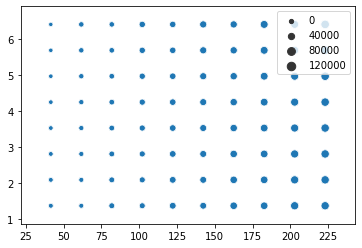

In [22]:
size = 10000
ax = sns.scatterplot(x=evolve_map[size:,2], y=evolve_map[size:,3], size=list(range(0, 10*size, 10)))
ax.set_xlim(left=xmin-20, right=xmax+20)
ax.set_ylim(bottom=ymin-0.5, top=ymax+0.5)

In [44]:
dir(ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_

In [17]:
lookup_table = darwin.lookup_table

In [19]:
import numpy as np
all_flops_choices = np.array(list(lookup_table['flops']['nas_block'].values())) + lookup_table['flops']['input_block'] + lookup_table['flops']['output_block']

In [35]:
np.quantile(all_flops_choices, 0.95)

49459706.0